# Data Analysis - Linear Regression

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline
#plt.style.use('seaborn') #ggplot

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler

### Data Cleansing

In [97]:
car = pd.read_csv('Automobile_data.csv', na_values='?')
car

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114.0,5400.0,23,28,16845.0
201,-1,95.0,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160.0,5300.0,19,25,19045.0
202,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134.0,5500.0,18,23,21485.0
203,-1,95.0,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106.0,4800.0,26,27,22470.0


In [98]:
car.isna().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [4]:
car.head(10)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0
5,2,NaN,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,15250.0
6,1,158.0,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,17710.0
7,1,NaN,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,18920.0
8,1,158.0,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140.0,5500.0,17,20,23875.0
9,0,NaN,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160.0,5500.0,16,22,NaN


In [5]:
car.tail(10)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
195,-1,74.0,volvo,gas,std,four,wagon,rwd,front,104.3,...,141,mpfi,3.78,3.15,9.5,114.0,5400.0,23,28,13415.0
196,-2,103.0,volvo,gas,std,four,sedan,rwd,front,104.3,...,141,mpfi,3.78,3.15,9.5,114.0,5400.0,24,28,15985.0
197,-1,74.0,volvo,gas,std,four,wagon,rwd,front,104.3,...,141,mpfi,3.78,3.15,9.5,114.0,5400.0,24,28,16515.0
198,-2,103.0,volvo,gas,turbo,four,sedan,rwd,front,104.3,...,130,mpfi,3.62,3.15,7.5,162.0,5100.0,17,22,18420.0
199,-1,74.0,volvo,gas,turbo,four,wagon,rwd,front,104.3,...,130,mpfi,3.62,3.15,7.5,162.0,5100.0,17,22,18950.0
200,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114.0,5400.0,23,28,16845.0
201,-1,95.0,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160.0,5300.0,19,25,19045.0
202,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134.0,5500.0,18,23,21485.0
203,-1,95.0,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106.0,4800.0,26,27,22470.0
204,-1,95.0,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114.0,5400.0,19,25,22625.0


In [6]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  164 non-null    float64
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       203 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [7]:
car.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

In [8]:
car.dtypes

symboling              int64
normalized-losses    float64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

In [9]:
car.columns[car.dtypes=='object']

Index(['make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style',
       'drive-wheels', 'engine-location', 'engine-type', 'num-of-cylinders',
       'fuel-system'],
      dtype='object')

In [10]:
car[["make","fuel-type"]]

,make,fuel-type
0,alfa-romero,gas
1,alfa-romero,gas
2,alfa-romero,gas
3,audi,gas
4,audi,gas
...,...,...
200,volvo,gas
201,volvo,gas
202,volvo,gas
203,volvo,diesel


In [11]:
car.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,164.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,201.000000,201.000000,205.000000,203.000000,203.000000,205.000000,205.000000,201.000000
mean,0.834146,122.000000,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329751,3.255423,10.142537,104.256158,5125.369458,25.219512,30.751220,13207.129353
std,1.245307,35.442168,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.273539,0.316717,3.972040,39.714369,479.334560,6.542142,6.886443,7947.066342
min,-2.000000,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,1.000000,115.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,150.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.590000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000
max,3.000000,256.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [12]:
car.isnull()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
201,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
202,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
203,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [13]:
car.isnull().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [14]:
car['normalized-losses']

0        NaN
1        NaN
2        NaN
3      164.0
4      164.0
       ...  
200     95.0
201     95.0
202     95.0
203     95.0
204     95.0
Name: normalized-losses, Length: 205, dtype: float64

In [15]:
car['normalized-losses'].unique()

array([ nan, 164., 158., 192., 188., 121.,  98.,  81., 118., 148., 110.,
       145., 137., 101.,  78., 106.,  85., 107., 104., 113., 150., 129.,
       115.,  93., 142., 161., 153., 125., 128., 122., 103., 168., 108.,
       194., 231., 119., 154.,  74., 186.,  83., 102.,  89.,  87.,  77.,
        91., 134.,  65., 197.,  90.,  94., 256.,  95.])

In [16]:
car['normalized-losses'].value_counts()

161.0    11
91.0      8
150.0     7
128.0     6
134.0     6
104.0     6
95.0      5
102.0     5
103.0     5
74.0      5
85.0      5
168.0     5
94.0      5
65.0      5
106.0     4
122.0     4
148.0     4
118.0     4
93.0      4
101.0     3
125.0     3
137.0     3
154.0     3
83.0      3
115.0     3
119.0     2
87.0      2
194.0     2
197.0     2
108.0     2
89.0      2
164.0     2
158.0     2
145.0     2
192.0     2
188.0     2
81.0      2
110.0     2
113.0     2
129.0     2
153.0     2
107.0     1
78.0      1
186.0     1
231.0     1
77.0      1
98.0      1
121.0     1
90.0      1
142.0     1
256.0     1
Name: normalized-losses, dtype: int64

In [17]:
car['normalized-losses'].mean()

122.0

In [18]:
car.mean()

C:\Users\Nana\AppData\Local\Temp\ipykernel_1980\1170622532.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  car.mean()


symboling                0.834146
normalized-losses      122.000000
wheel-base              98.756585
length                 174.049268
width                   65.907805
height                  53.724878
curb-weight           2555.565854
engine-size            126.907317
bore                     3.329751
stroke                   3.255423
compression-ratio       10.142537
horsepower             104.256158
peak-rpm              5125.369458
city-mpg                25.219512
highway-mpg             30.751220
price                13207.129353
dtype: float64

In [19]:
round(car.mean(),2)

C:\Users\Nana\AppData\Local\Temp\ipykernel_1980\1471368861.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  round(car.mean(),2)


symboling                0.83
normalized-losses      122.00
wheel-base              98.76
length                 174.05
width                   65.91
height                  53.72
curb-weight           2555.57
engine-size            126.91
bore                     3.33
stroke                   3.26
compression-ratio       10.14
horsepower             104.26
peak-rpm              5125.37
city-mpg                25.22
highway-mpg             30.75
price                13207.13
dtype: float64

In [20]:
avg = round(car.mean(),2)

C:\Users\Nana\AppData\Local\Temp\ipykernel_1980\2182163123.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  avg = round(car.mean(),2)


In [21]:
avg

symboling                0.83
normalized-losses      122.00
wheel-base              98.76
length                 174.05
width                   65.91
height                  53.72
curb-weight           2555.57
engine-size            126.91
bore                     3.33
stroke                   3.26
compression-ratio       10.14
horsepower             104.26
peak-rpm              5125.37
city-mpg                25.22
highway-mpg             30.75
price                13207.13
dtype: float64

In [22]:
car_df = car.copy()

In [23]:
car_df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114.0,5400.0,23,28,16845.0
201,-1,95.0,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160.0,5300.0,19,25,19045.0
202,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134.0,5500.0,18,23,21485.0
203,-1,95.0,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106.0,4800.0,26,27,22470.0


In [24]:
car_df = car_df.fillna(avg)

In [25]:
car_df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114.0,5400.0,23,28,16845.0
201,-1,95.0,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160.0,5300.0,19,25,19045.0
202,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134.0,5500.0,18,23,21485.0
203,-1,95.0,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106.0,4800.0,26,27,22470.0


In [26]:
car_df.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         2
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [27]:
car_df['num-of-doors'].unique()

array(['two', 'four', nan], dtype=object)

In [28]:
car_df['num-of-doors'].value_counts()

four    114
two      89
Name: num-of-doors, dtype: int64

In [29]:
car_df['num-of-doors'] = car_df['num-of-doors'].fillna('four')

In [30]:
car_df['num-of-doors'].value_counts()

four    116
two      89
Name: num-of-doors, dtype: int64

In [31]:
car_df['num-of-doors'].mode()

0    four
Name: num-of-doors, dtype: object

In [32]:
car_df.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [99]:
car_df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114.0,5400.0,23,28,16845.0
201,-1,95.0,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160.0,5300.0,19,25,19045.0
202,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134.0,5500.0,18,23,21485.0
203,-1,95.0,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106.0,4800.0,26,27,22470.0


In [33]:
#car_df['num-of-doors'] = car_df['num-of-doors'].fillna(car_df['num-of-doors'].mode())

In [35]:
car_df2 = car_df.copy()

In [36]:
car_df2['num-of-doors'].unique()

array(['two', 'four'], dtype=object)

In [37]:
car_df2['num-of-doors'] = car_df2['num-of-doors'].replace({'two':2, 'four':4})

In [38]:
car_df2['num-of-doors'].unique()

array([2, 4], dtype=int64)

In [39]:
car_df2['num-of-cylinders'].unique()

array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
      dtype=object)

In [40]:
car_df2['num-of-cylinders'] = car_df2['num-of-cylinders'].map({'four':4, 'six':6, 'five':5, 'three':3, 
                                                             'twelve':12, 'two':2, 'eight':8})

In [41]:
car_df2.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,2,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,122.0,alfa-romero,gas,std,2,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,122.0,alfa-romero,gas,std,2,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,4,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,4,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [42]:
car_df2.dtypes

symboling              int64
normalized-losses    float64
make                  object
fuel-type             object
aspiration            object
num-of-doors           int64
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders       int64
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

In [43]:
car_df2.columns[car_df2.dtypes=='object']

Index(['make', 'fuel-type', 'aspiration', 'body-style', 'drive-wheels',
       'engine-location', 'engine-type', 'fuel-system'],
      dtype='object')

### Data Correlation

In [44]:
car_df2.corr()

,symboling,normalized-losses,num-of-doors,wheel-base,length,width,height,curb-weight,num-of-cylinders,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
symboling,1.000000,0.465190,-0.663595,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.113129,-0.105790,-0.130051,-0.008191,-0.178515,0.071389,0.273679,-0.035823,0.034606,-0.082201
normalized-losses,0.465190,1.000000,-0.357192,-0.056518,0.019209,0.084195,-0.370706,0.097785,0.108081,0.110997,-0.029250,0.055182,-0.114525,0.203434,0.237748,-0.218749,-0.178221,0.133999
num-of-doors,-0.663595,-0.357192,1.000000,0.439635,0.385675,0.197735,0.540286,0.190720,-0.019503,0.013919,0.108489,-0.007217,0.171797,-0.128184,-0.240298,-0.014271,-0.037452,0.041945
wheel-base,-0.531954,-0.056518,0.439635,1.000000,0.874587,0.795144,0.589435,0.776386,0.339507,0.569329,0.488750,0.160779,0.249786,0.351957,-0.360704,-0.470414,-0.544082,0.583168
length,-0.357612,0.019209,0.385675,0.874587,1.000000,0.841118,0.491029,0.877728,0.430672,0.683360,0.606454,0.129404,0.158414,0.554435,-0.287031,-0.670909,-0.704662,0.682986
width,-0.232919,0.084195,0.197735,0.795144,0.841118,1.000000,0.279210,0.867032,0.545007,0.735433,0.559150,0.182911,0.181129,0.642196,-0.219859,-0.642704,-0.677218,0.728699
height,-0.541038,-0.370706,0.540286,0.589435,0.491029,0.279210,1.000000,0.295572,-0.013995,0.067149,0.171071,-0.055834,0.261214,-0.110137,-0.320602,-0.048640,-0.107358,0.134388
curb-weight,-0.227691,0.097785,0.190720,0.776386,0.877728,0.867032,0.295572,1.000000,0.609727,0.850594,0.648480,0.168703,0.151362,0.750968,-0.266283,-0.757414,-0.797465,0.820825
num-of-cylinders,-0.113129,0.108081,-0.019503,0.339507,0.430672,0.545007,-0.013995,0.609727,1.000000,0.846031,0.231399,0.007521,-0.020002,0.691208,-0.124358,-0.445837,-0.466666,0.687770
engine-size,-0.105790,0.110997,0.013919,0.569329,0.683360,0.735433,0.067149,0.850594,0.846031,1.000000,0.583774,0.202720,0.028971,0.810713,-0.244599,-0.653658,-0.677470,0.861752


<AxesSubplot:>

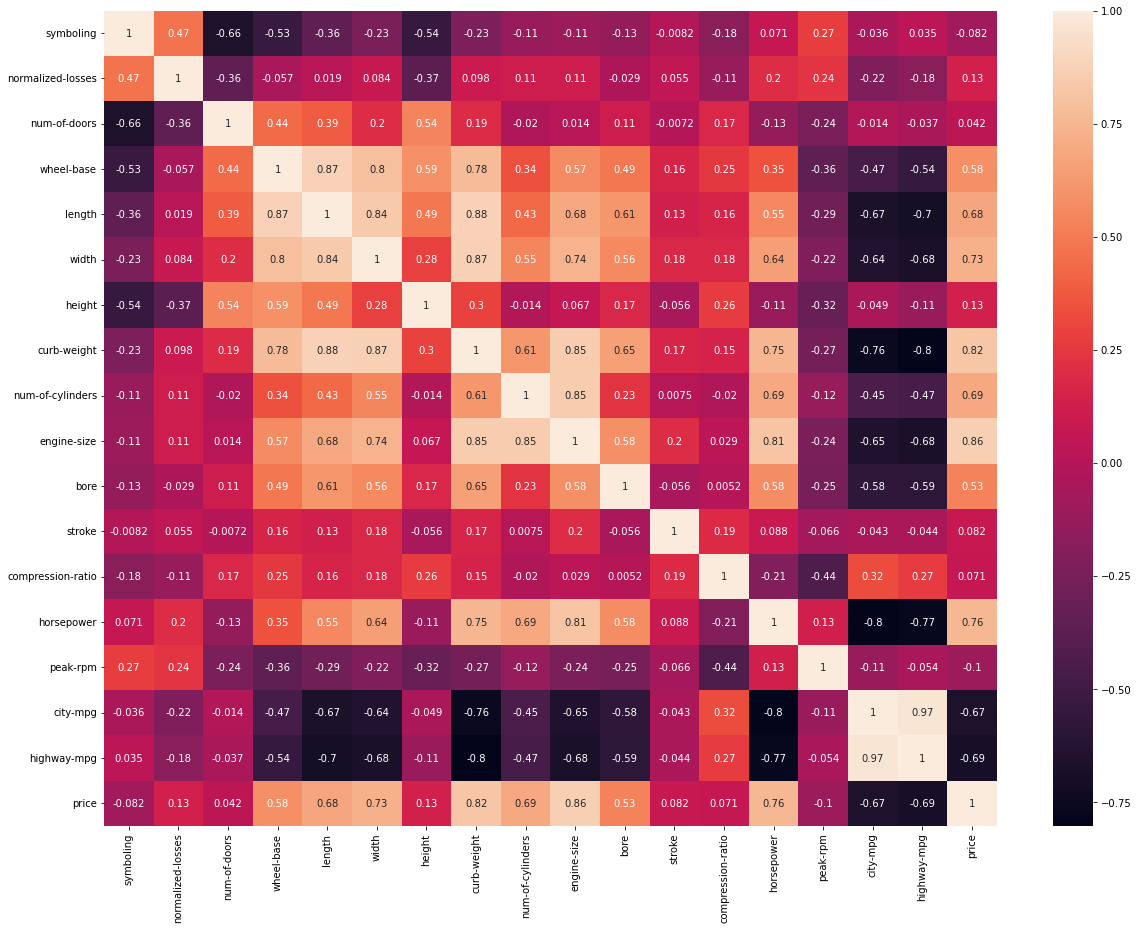

In [45]:
plt.figure(figsize=(20,15))
sns.heatmap(car_df2.corr(), annot=True)

In [46]:
car_df2.corr().unstack()

symboling  symboling            1.000000
           normalized-losses    0.465190
           num-of-doors        -0.663595
           wheel-base          -0.531954
           length              -0.357612
                                  ...   
price      horsepower           0.757917
           peak-rpm            -0.100854
           city-mpg            -0.667449
           highway-mpg         -0.690526
           price                1.000000
Length: 324, dtype: float64

In [47]:
feature_corr = car_df2.corr().unstack().sort_values()
feature_corr

city-mpg           horsepower          -0.803162
horsepower         city-mpg            -0.803162
highway-mpg        curb-weight         -0.797465
curb-weight        highway-mpg         -0.797465
highway-mpg        horsepower          -0.770903
                                          ...   
compression-ratio  compression-ratio    1.000000
horsepower         horsepower           1.000000
peak-rpm           peak-rpm             1.000000
num-of-cylinders   num-of-cylinders     1.000000
price              price                1.000000
Length: 324, dtype: float64

In [48]:
feature_corr[(feature_corr>0.7)&(feature_corr<1)]

price             width               0.728699
width             price               0.728699
                  engine-size         0.735433
engine-size       width               0.735433
horsepower        curb-weight         0.750968
curb-weight       horsepower          0.750968
price             horsepower          0.757917
horsepower        price               0.757917
wheel-base        curb-weight         0.776386
curb-weight       wheel-base          0.776386
wheel-base        width               0.795144
width             wheel-base          0.795144
horsepower        engine-size         0.810713
engine-size       horsepower          0.810713
curb-weight       price               0.820825
price             curb-weight         0.820825
width             length              0.841118
length            width               0.841118
num-of-cylinders  engine-size         0.846031
engine-size       num-of-cylinders    0.846031
curb-weight       engine-size         0.850594
engine-size  

In [49]:
#Show Highly Correlated Features > 0.7
print(feature_corr[(abs(feature_corr)>0.7) & (abs(feature_corr)<1)].drop_duplicates())

city-mpg          horsepower    -0.803162
highway-mpg       curb-weight   -0.797465
                  horsepower    -0.770903
curb-weight       city-mpg      -0.757414
highway-mpg       length        -0.704662
price             width          0.728699
width             engine-size    0.735433
horsepower        curb-weight    0.750968
price             horsepower     0.757917
wheel-base        curb-weight    0.776386
                  width          0.795144
horsepower        engine-size    0.810713
curb-weight       price          0.820825
width             length         0.841118
num-of-cylinders  engine-size    0.846031
curb-weight       engine-size    0.850594
price             engine-size    0.861752
curb-weight       width          0.867032
wheel-base        length         0.874587
curb-weight       length         0.877728
city-mpg          highway-mpg    0.971337
dtype: float64


In [50]:
high_corr_df = pd.DataFrame(feature_corr[(abs(feature_corr)>0.7) & (abs(feature_corr)<1)].drop_duplicates())
high_corr_df.index

MultiIndex([(        'city-mpg',  'horsepower'),
            (     'highway-mpg', 'curb-weight'),
            (     'highway-mpg',  'horsepower'),
            (     'curb-weight',    'city-mpg'),
            (     'highway-mpg',      'length'),
            (           'price',       'width'),
            (           'width', 'engine-size'),
            (      'horsepower', 'curb-weight'),
            (           'price',  'horsepower'),
            (      'wheel-base', 'curb-weight'),
            (      'wheel-base',       'width'),
            (      'horsepower', 'engine-size'),
            (     'curb-weight',       'price'),
            (           'width',      'length'),
            ('num-of-cylinders', 'engine-size'),
            (     'curb-weight', 'engine-size'),
            (           'price', 'engine-size'),
            (     'curb-weight',       'width'),
            (      'wheel-base',      'length'),
            (     'curb-weight',      'length'),
            (       

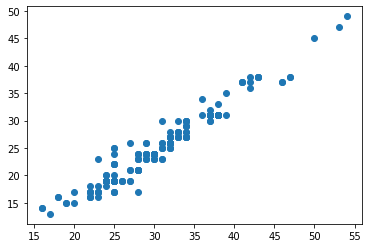

In [51]:
plt.scatter(car_df2['highway-mpg'], car_df2['city-mpg'])

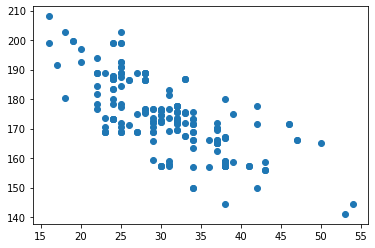

In [52]:
plt.scatter(car_df2['highway-mpg'], car_df2['length'])

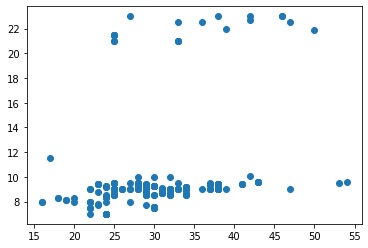

In [53]:
plt.scatter(car_df2['highway-mpg'], car_df2['compression-ratio'])

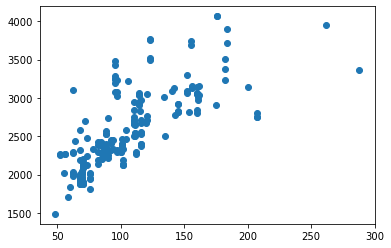

In [54]:
plt.scatter(car_df2['horsepower'], car_df2['curb-weight'])

<Figure size 432x288 with 0 Axes>

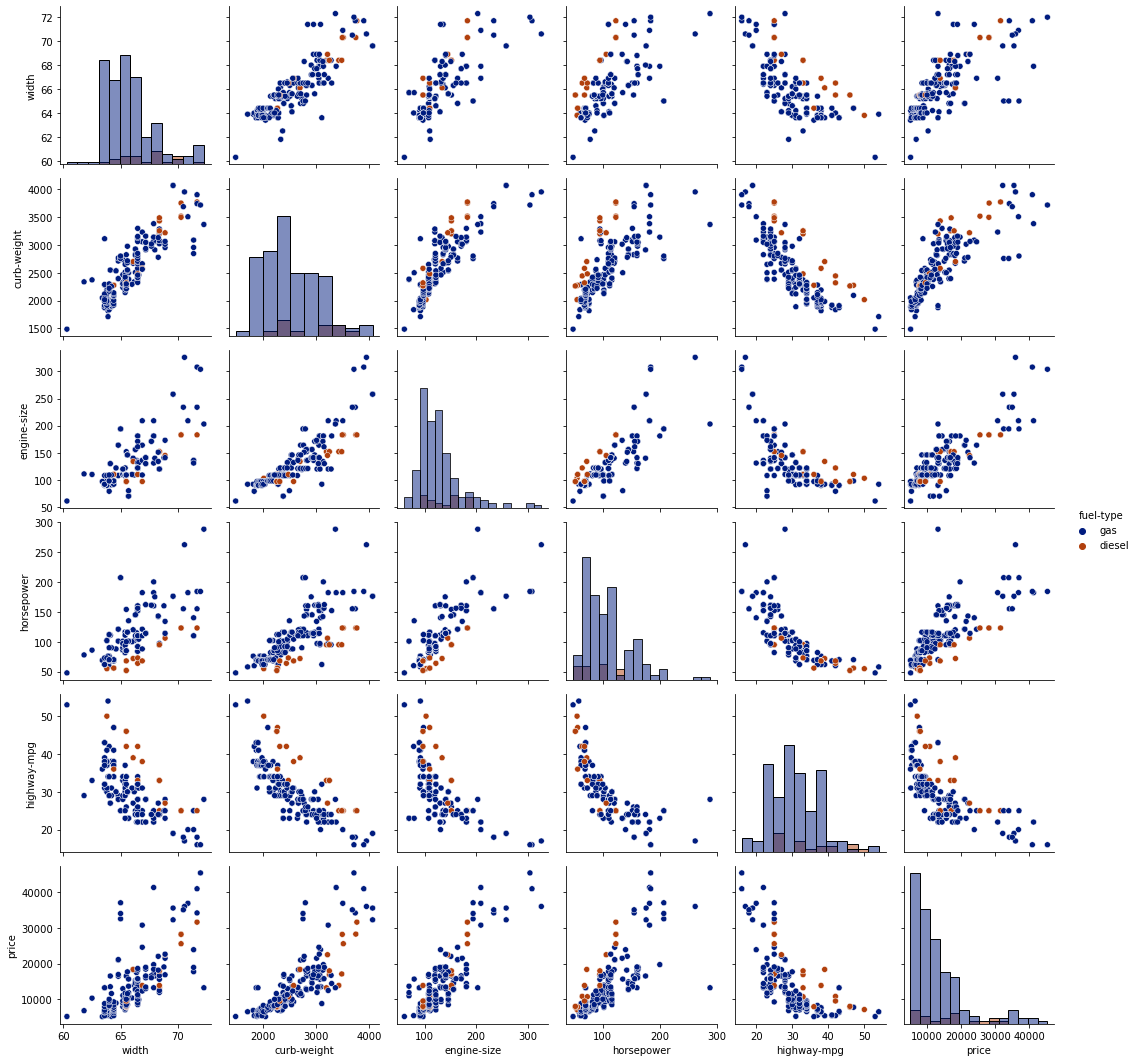

In [55]:
plt.figure()
sns.pairplot(car_df2[["width", "curb-weight","engine-size","horsepower","highway-mpg","fuel-type","price"]],
             hue="fuel-type", palette='dark', diag_kind="hist")
plt.show()

### Features Reduction

In [56]:
car_reduc = car_df2.drop(columns = ['width','length','wheel-base','engine-size','highway-mpg','horsepower','city-mpg'])

In [57]:
car_reduc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    float64
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    int64  
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   height             205 non-null    float64
 10  curb-weight        205 non-null    int64  
 11  engine-type        205 non-null    object 
 12  num-of-cylinders   205 non-null    int64  
 13  fuel-system        205 non-null    object 
 14  bore               205 non-null    float64
 15  stroke             205 non-null    float64
 16  compression-ratio  205 non

<AxesSubplot:>

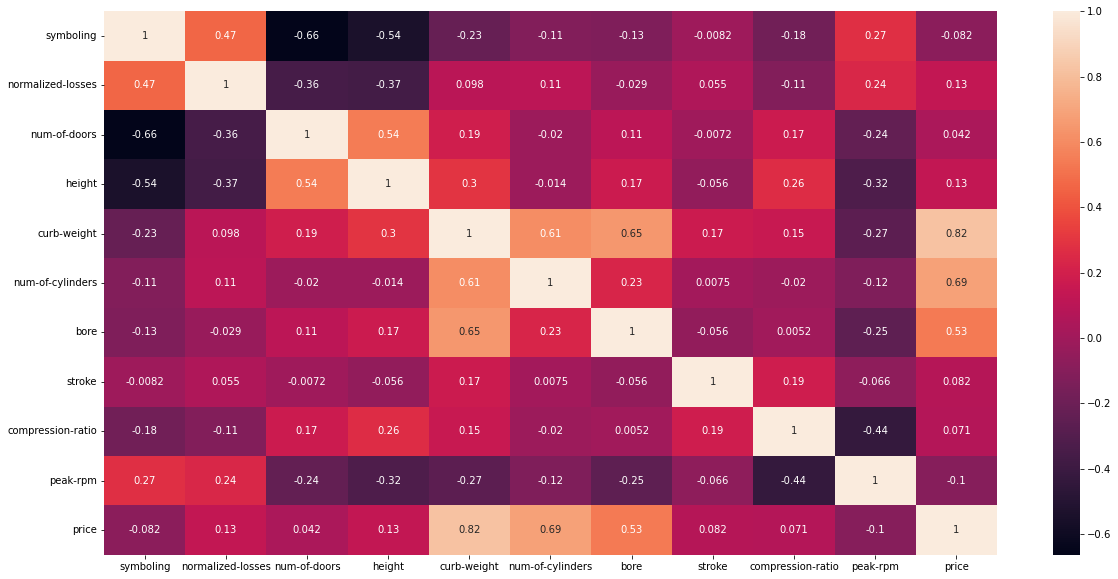

In [58]:
plt.figure(figsize=(20, 10))
sns.heatmap(car_reduc.corr(), annot= True)

### Features Distribution

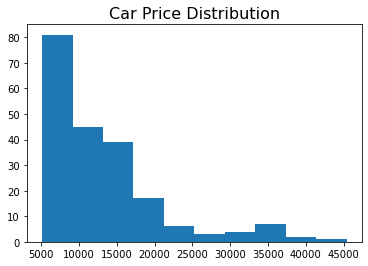

In [59]:
plt.hist(car_reduc['price'])
plt.title('Car Price Distribution', size=16)
plt.show()

In [60]:
car_reduc.columns[car_reduc.dtypes!='object']

Index(['symboling', 'normalized-losses', 'num-of-doors', 'height',
       'curb-weight', 'num-of-cylinders', 'bore', 'stroke',
       'compression-ratio', 'peak-rpm', 'price'],
      dtype='object')

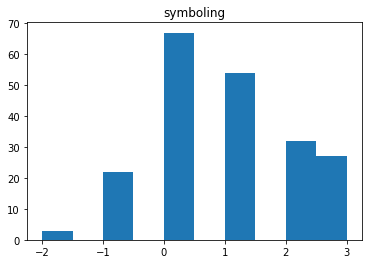

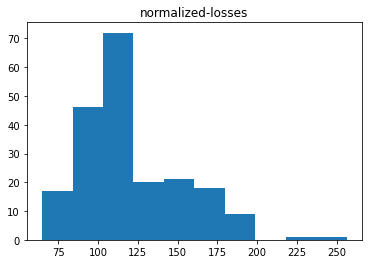

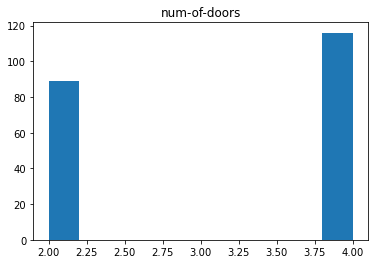

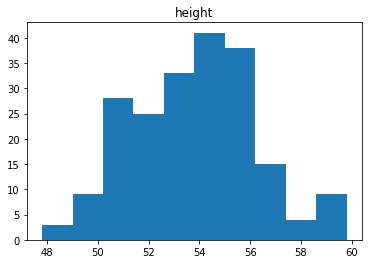

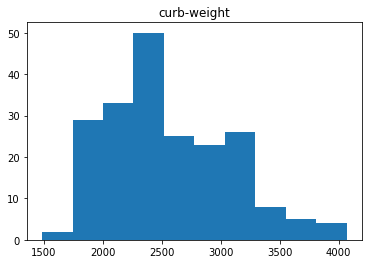

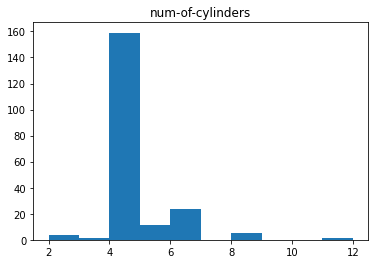

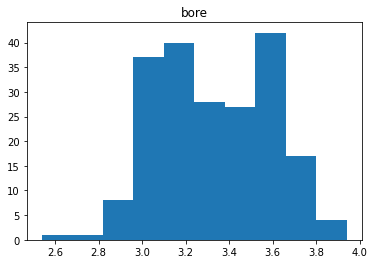

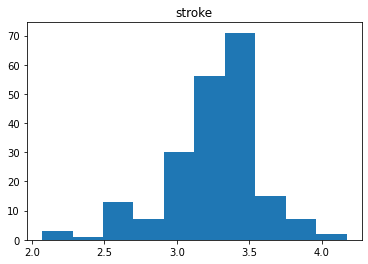

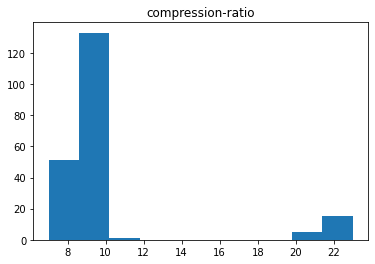

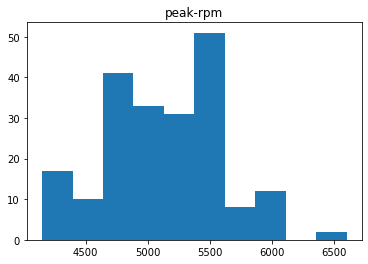

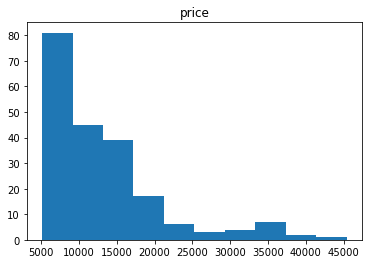

In [61]:
num_feature = car_reduc.columns[car_reduc.dtypes!='object']

def my_plot(feature):
    plt.hist(car_reduc[feature])
    plt.title(feature)
    plt.show()
        
for i in num_feature:
    my_plot(i)

In [ ]:
car_reduc['normalized-losses_log'] = np.log(car_reduc['normalized-losses']+1)

In [62]:
car_reduc['price'].describe()

count      205.000000
mean     13207.129366
std       7868.768212
min       5118.000000
25%       7788.000000
50%      10595.000000
75%      16500.000000
max      45400.000000
Name: price, dtype: float64

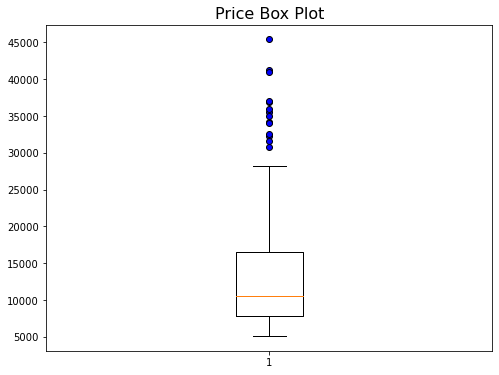

In [63]:
plt.figure(figsize=(8,6))
plt.boxplot(car_reduc['price'], flierprops=dict(markerfacecolor='b', marker='o'), showfliers=True, vert=True)
plt.title('Price Box Plot', size=16)
plt.show()

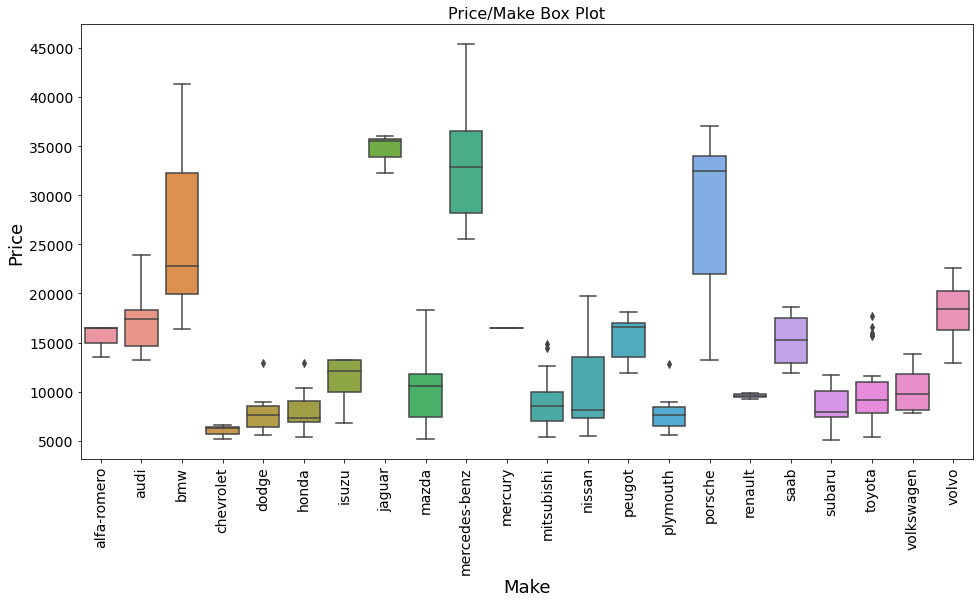

In [64]:
plt.figure(figsize=(16,8))
sns.boxplot(x=car_reduc['make'], y=car_reduc['price'])
plt.title('Price/Make Box Plot', size=16)
plt.xlabel('Make', size=18)
plt.ylabel('Price', size=18)
plt.xticks(rotation='vertical', size=14)
plt.yticks(rotation='horizontal', size=14)
plt.show()

In [65]:
car_reduc['make'].value_counts()

toyota           32
nissan           18
mazda            17
mitsubishi       13
honda            13
volkswagen       12
subaru           12
peugot           11
volvo            11
dodge             9
mercedes-benz     8
bmw               8
audi              7
plymouth          7
saab              6
porsche           5
isuzu             4
jaguar            3
chevrolet         3
alfa-romero       3
renault           2
mercury           1
Name: make, dtype: int64

In [66]:
x_data = car_reduc['make'].value_counts().index
y_data = car_reduc['make'].value_counts()

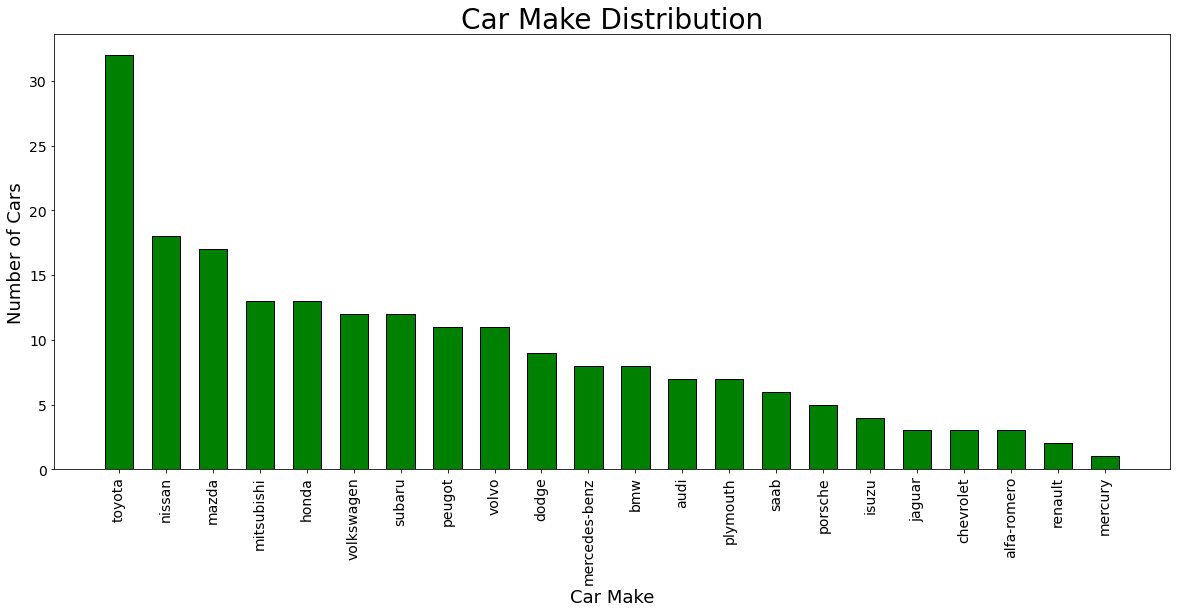

In [67]:
plt.figure(figsize=(20,8))
plt.bar(x=x_data, height=y_data, color='g', edgecolor='k', linewidth=1, width=0.6)
plt.title('Car Make Distribution', size=28)
plt.xlabel('Car Make', size=18)
plt.ylabel('Number of Cars', size=18)
plt.xticks(rotation='vertical', size=14)
plt.yticks(rotation='horizontal', size=14)

plt.show()

### Categorical Features Transformation

In [68]:
car_cat = car_reduc.select_dtypes(include=['object'])

In [69]:
car_cat.head()

,make,fuel-type,aspiration,body-style,drive-wheels,engine-location,engine-type,fuel-system
0,alfa-romero,gas,std,convertible,rwd,front,dohc,mpfi
1,alfa-romero,gas,std,convertible,rwd,front,dohc,mpfi
2,alfa-romero,gas,std,hatchback,rwd,front,ohcv,mpfi
3,audi,gas,std,sedan,fwd,front,ohc,mpfi
4,audi,gas,std,sedan,4wd,front,ohc,mpfi


In [70]:
pd.get_dummies(car_cat).columns  #drop_first=True

Index(['make_alfa-romero', 'make_audi', 'make_bmw', 'make_chevrolet',
       'make_dodge', 'make_honda', 'make_isuzu', 'make_jaguar', 'make_mazda',
       'make_mercedes-benz', 'make_mercury', 'make_mitsubishi', 'make_nissan',
       'make_peugot', 'make_plymouth', 'make_porsche', 'make_renault',
       'make_saab', 'make_subaru', 'make_toyota', 'make_volkswagen',
       'make_volvo', 'fuel-type_diesel', 'fuel-type_gas', 'aspiration_std',
       'aspiration_turbo', 'body-style_convertible', 'body-style_hardtop',
       'body-style_hatchback', 'body-style_sedan', 'body-style_wagon',
       'drive-wheels_4wd', 'drive-wheels_fwd', 'drive-wheels_rwd',
       'engine-location_front', 'engine-location_rear', 'engine-type_dohc',
       'engine-type_dohcv', 'engine-type_l', 'engine-type_ohc',
       'engine-type_ohcf', 'engine-type_ohcv', 'engine-type_rotor',
       'fuel-system_1bbl', 'fuel-system_2bbl', 'fuel-system_4bbl',
       'fuel-system_idi', 'fuel-system_mfi', 'fuel-system_mpfi',
    

In [71]:
car_clear = pd.get_dummies(car_cat, drop_first=True)

In [72]:
car_clear.head()

,make_audi,make_bmw,make_chevrolet,make_dodge,make_honda,make_isuzu,make_jaguar,make_mazda,make_mercedes-benz,make_mercury,...,engine-type_ohcf,engine-type_ohcv,engine-type_rotor,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [73]:
car_clear = pd.get_dummies(car_reduc, drop_first=True)
#columns=['make','fuel-type','aspiration','body-style','drive-wheels','engine-location','engine-type','fuel-system']

In [74]:
car_clear.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 54 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   symboling             205 non-null    int64  
 1   normalized-losses     205 non-null    float64
 2   num-of-doors          205 non-null    int64  
 3   height                205 non-null    float64
 4   curb-weight           205 non-null    int64  
 5   num-of-cylinders      205 non-null    int64  
 6   bore                  205 non-null    float64
 7   stroke                205 non-null    float64
 8   compression-ratio     205 non-null    float64
 9   peak-rpm              205 non-null    float64
 10  price                 205 non-null    float64
 11  make_audi             205 non-null    uint8  
 12  make_bmw              205 non-null    uint8  
 13  make_chevrolet        205 non-null    uint8  
 14  make_dodge            205 non-null    uint8  
 15  make_honda            2

In [75]:
car_clear.head()

,symboling,normalized-losses,num-of-doors,height,curb-weight,num-of-cylinders,bore,stroke,compression-ratio,peak-rpm,...,engine-type_ohcf,engine-type_ohcv,engine-type_rotor,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi
0,3,122.0,2,48.8,2548,4,3.47,2.68,9.0,5000.0,...,0,0,0,0,0,0,0,1,0,0
1,3,122.0,2,48.8,2548,4,3.47,2.68,9.0,5000.0,...,0,0,0,0,0,0,0,1,0,0
2,1,122.0,2,52.4,2823,6,2.68,3.47,9.0,5000.0,...,0,1,0,0,0,0,0,1,0,0
3,2,164.0,4,54.3,2337,4,3.19,3.40,10.0,5500.0,...,0,0,0,0,0,0,0,1,0,0
4,2,164.0,4,54.3,2824,5,3.19,3.40,8.0,5500.0,...,0,0,0,0,0,0,0,1,0,0


### Divide Data into Train & Test

In [76]:
x = car_clear.drop('price', axis=1)
y = pd.DataFrame(car_clear['price'])

In [77]:
x.head()

,symboling,normalized-losses,num-of-doors,height,curb-weight,num-of-cylinders,bore,stroke,compression-ratio,peak-rpm,...,engine-type_ohcf,engine-type_ohcv,engine-type_rotor,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi
0,3,122.0,2,48.8,2548,4,3.47,2.68,9.0,5000.0,...,0,0,0,0,0,0,0,1,0,0
1,3,122.0,2,48.8,2548,4,3.47,2.68,9.0,5000.0,...,0,0,0,0,0,0,0,1,0,0
2,1,122.0,2,52.4,2823,6,2.68,3.47,9.0,5000.0,...,0,1,0,0,0,0,0,1,0,0
3,2,164.0,4,54.3,2337,4,3.19,3.40,10.0,5500.0,...,0,0,0,0,0,0,0,1,0,0
4,2,164.0,4,54.3,2824,5,3.19,3.40,8.0,5500.0,...,0,0,0,0,0,0,0,1,0,0


In [78]:
y.head()

,price
0,13495.0
1,16500.0
2,16500.0
3,13950.0
4,17450.0


In [79]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [80]:
print(x_train.shape)
x_train.head()

(143, 53)


,symboling,normalized-losses,num-of-doors,height,curb-weight,num-of-cylinders,bore,stroke,compression-ratio,peak-rpm,...,engine-type_ohcf,engine-type_ohcv,engine-type_rotor,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi
40,0,85.0,4,54.1,2372,4,3.15,3.58,9.0,5800.0,...,0,0,0,0,0,0,0,0,0,0
60,0,115.0,4,55.5,2410,4,3.39,3.39,8.6,4800.0,...,0,0,0,1,0,0,0,0,0,0
56,3,150.0,2,49.6,2380,2,3.33,3.26,9.4,6000.0,...,0,0,1,0,1,0,0,0,0,0
101,0,128.0,4,55.1,3095,6,3.43,3.27,9.0,5200.0,...,0,1,0,0,0,0,0,1,0,0
86,1,125.0,4,51.6,2405,4,3.35,3.46,8.5,5000.0,...,0,0,0,1,0,0,0,0,0,0


In [81]:
print(y_train.shape)
y_train.head()

(143, 1)


,price
40,10295.0
60,8495.0
56,11845.0
101,13499.0
86,8189.0


In [82]:
x_test.shape, y_test.shape

((62, 53), (62, 1))

### Numerical Features Scaling

In [83]:
#Normalization: (X-X.min())/(X.max()-X.min())
#Standardization: (X-X.mean())/X.std()

scaler_x = MinMaxScaler().fit(x_train)
scaler_y = MinMaxScaler().fit(y_train)

In [84]:
x_train_sc = scaler_x.transform(x_train)
x_test_sc = scaler_x.transform(x_test)

In [85]:
y_train_sc = scaler_y.transform(y_train)
y_test_sc = scaler_y.transform(y_test)

In [86]:
y_train

,price
40,10295.0
60,8495.0
56,11845.0
101,13499.0
86,8189.0
...,...
67,25552.0
192,13845.0
117,18150.0
47,32250.0


In [87]:
y_train_sc

array([[0.14259751],
       [0.09226898],
       [0.18593597],
       [0.2321823 ],
       [0.08371313],
       [0.03075633],
       [0.10018174],
       [0.07840067],
       [0.06151265],
       [0.07828883],
       [0.02516427],
       [0.05195023],
       [0.05399133],
       [0.32727527],
       [0.06442052],
       [0.18747379],
       [0.06341395],
       [0.24227597],
       [0.31771285],
       [0.54159094],
       [0.09403048],
       [0.22382217],
       [0.08388089],
       [0.76423878],
       [0.16365161],
       [0.2264784 ],
       [0.32573745],
       [0.11360268],
       [0.1411995 ],
       [0.31609115],
       [0.10205508],
       [0.10418006],
       [0.21163148],
       [0.04445687],
       [0.31413393],
       [0.20257235],
       [1.        ],
       [0.3016916 ],
       [0.07213756],
       [0.00427793],
       [0.08539075],
       [0.24479239],
       [0.06022648],
       [0.01054103],
       [0.07110303],
       [0.38459388],
       [0.        ],
       [0.232

### Apply Linear Regression

In [88]:
lr_model = LinearRegression()
lr_model.fit(x_train_sc, y_train_sc)
y_pred_sc = lr_model.predict(x_test_sc)

In [89]:
y_test_sc

array([[ 0.04473647],
       [ 0.29512093],
       [ 0.28114078],
       [-0.00123025],
       [ 0.13420942],
       [ 0.16787362],
       [ 0.0054243 ],
       [ 0.07557668],
       [ 0.3356354 ],
       [ 0.03729904],
       [ 0.44107368],
       [ 0.22402153],
       [ 0.1607717 ],
       [ 0.36764994],
       [ 0.22402153],
       [ 0.13404166],
       [ 0.11463722],
       [ 0.38375507],
       [ 0.0754928 ],
       [ 0.03615266],
       [ 0.13320285],
       [ 0.29036768],
       [ 0.13141339],
       [ 0.17765972],
       [ 0.30205508],
       [-0.00215294],
       [ 0.0487348 ],
       [ 0.32154341],
       [ 0.08843842],
       [ 0.00849993],
       [ 0.07772962],
       [ 0.1983783 ],
       [ 0.47037607],
       [ 0.10493499],
       [ 0.04624633],
       [ 1.00992591],
       [ 0.1789459 ],
       [ 0.36222564],
       [ 0.03304907],
       [ 1.12414372],
       [ 0.22402153],
       [ 0.34265343],
       [ 0.81054103],
       [ 0.27526912],
       [ 0.16955124],
       [ 0

In [90]:
y_pred_sc

array([[ 2.63219164e-02],
       [ 3.05852949e-01],
       [ 2.42212771e-01],
       [-1.55367768e-01],
       [ 1.54601515e-01],
       [ 1.65261591e-01],
       [-4.60729235e-03],
       [-8.03739795e-03],
       [ 3.00091964e-01],
       [ 4.39302382e-02],
       [ 4.58232920e-01],
       [ 7.53804811e-01],
       [ 2.10740746e-01],
       [ 1.71089692e-01],
       [-6.11838139e-02],
       [ 1.69427622e-01],
       [ 2.43258827e-01],
       [ 2.97685841e-01],
       [ 9.45536428e-02],
       [ 7.55072859e-02],
       [ 1.21631650e-01],
       [ 1.76360074e-01],
       [ 2.48618322e-01],
       [ 1.92866509e-01],
       [ 3.42096335e-01],
       [ 7.90968771e-02],
       [ 5.96798190e-02],
       [ 1.55677474e-01],
       [ 7.59000379e-02],
       [ 1.81369911e-02],
       [ 1.01429192e-01],
       [ 1.25617081e-01],
       [ 4.63165211e-01],
       [ 9.76510271e-02],
       [ 6.90178365e-02],
       [ 6.43436669e-01],
       [ 2.34498414e-01],
       [ 2.82870481e-01],
       [-1.9

In [91]:
mae = mean_absolute_error(y_test_sc, y_pred_sc)
rmse = np.sqrt(mean_squared_error(y_test_sc, y_pred_sc))

print('MAE = ', mae.round(4))
print('RMSE = ', rmse.round(4))

MAE =  0.076
RMSE =  0.1258


In [92]:
y_test_inv = scaler_y.inverse_transform(y_test_sc.reshape(-1,1))
y_pred_inv = scaler_y.inverse_transform(y_pred_sc.reshape(-1,1))

actual_mae = mean_absolute_error(y_test_inv, y_pred_inv)
actual_rmse = np.sqrt(mean_squared_error(y_test_inv, y_pred_inv))

print('Actual MAE = ', int(actual_mae))
print('Actual RMSE = ', int(actual_rmse))

Actual MAE =  2716
Actual RMSE =  4498


In [93]:
y_test_inv

array([[ 6795.  ],
       [15750.  ],
       [15250.  ],
       [ 5151.  ],
       [ 9995.  ],
       [11199.  ],
       [ 5389.  ],
       [ 7898.  ],
       [17199.  ],
       [ 6529.  ],
       [20970.  ],
       [13207.13],
       [10945.  ],
       [18344.  ],
       [13207.13],
       [ 9989.  ],
       [ 9295.  ],
       [18920.  ],
       [ 7895.  ],
       [ 6488.  ],
       [ 9959.  ],
       [15580.  ],
       [ 9895.  ],
       [11549.  ],
       [15998.  ],
       [ 5118.  ],
       [ 6938.  ],
       [16695.  ],
       [ 8358.  ],
       [ 5499.  ],
       [ 7975.  ],
       [12290.  ],
       [22018.  ],
       [ 8948.  ],
       [ 6849.  ],
       [41315.  ],
       [11595.  ],
       [18150.  ],
       [ 6377.  ],
       [45400.  ],
       [13207.13],
       [17450.  ],
       [34184.  ],
       [15040.  ],
       [11259.  ],
       [ 7609.  ],
       [ 7609.  ],
       [14869.  ],
       [11694.  ],
       [ 8495.  ],
       [23875.  ],
       [ 7099.  ],
       [ 805

In [94]:
y_pred_inv

array([[ 6136.40333901],
       [16133.83073373],
       [13857.73973857],
       [ -361.72822121],
       [10724.32319856],
       [11105.58080105],
       [ 5030.22018901],
       [ 4907.54246249],
       [15927.78907656],
       [ 6766.16496835],
       [21583.70037961],
       [32154.82905923],
       [12732.14276398],
       [11314.02283987],
       [ 3006.76089649],
       [11254.57891772],
       [13895.15196132],
       [15841.73409204],
       [ 8576.71103619],
       [ 7895.51807868],
       [ 9545.15597017],
       [11502.51804617],
       [14086.83429391],
       [12092.87070597],
       [17430.07541045],
       [ 8023.89980828],
       [ 7329.44872759],
       [10762.80487064],
       [ 7909.56485445],
       [ 5843.66948793],
       [ 8822.61506263],
       [ 9687.69488965],
       [21760.10377665],
       [ 8687.4889826 ],
       [ 7663.42292357],
       [28207.51247763],
       [13581.83577788],
       [15311.86274748],
       [ 4491.05503896],
       [33198.90291816],
